In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('stats_df.csv')

In [3]:
df.shape

(84, 10)

In [4]:
df.head()

,Country,Year,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,new_xg,Fouled,results
0,Germany,2010,0.816923,0.513077,0.458462,-0.367692,0.142308,1.030100,0.160000,3
1,Germany,2014,0.755385,0.719231,0.601538,0.316154,0.198462,1.650710,0.163846,1
2,Germany,2018,-0.066154,0.615385,1.570000,0.565385,0.930769,-30.732480,0.520000,32
3,Germany,2006,0.560000,0.482308,0.450769,0.300769,0.272308,1.487637,1.487637,3
4,Germany,2002,0.563077,0.426923,0.280769,-0.102308,0.011538,1.668033,0.053847,2


In [5]:
y = df['results']


In [6]:
X = df.drop(columns=['results'])

In [7]:
X.head()

,Country,Year,goals_z,xg_z,boxtouches_z,progpasses_z,progruns_z,new_xg,Fouled
0,Germany,2010,0.816923,0.513077,0.458462,-0.367692,0.142308,1.030100,0.160000
1,Germany,2014,0.755385,0.719231,0.601538,0.316154,0.198462,1.650710,0.163846
2,Germany,2018,-0.066154,0.615385,1.570000,0.565385,0.930769,-30.732480,0.520000
3,Germany,2006,0.560000,0.482308,0.450769,0.300769,0.272308,1.487637,1.487637
4,Germany,2002,0.563077,0.426923,0.280769,-0.102308,0.011538,1.668033,0.053847


<AxesSubplot:xlabel='goals_z'>

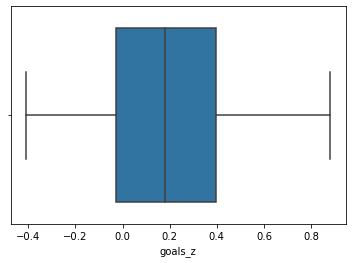

In [8]:
import seaborn as sns
sns.boxplot(x=df['goals_z'])

In [9]:
import matplotlib.pyplot as plt


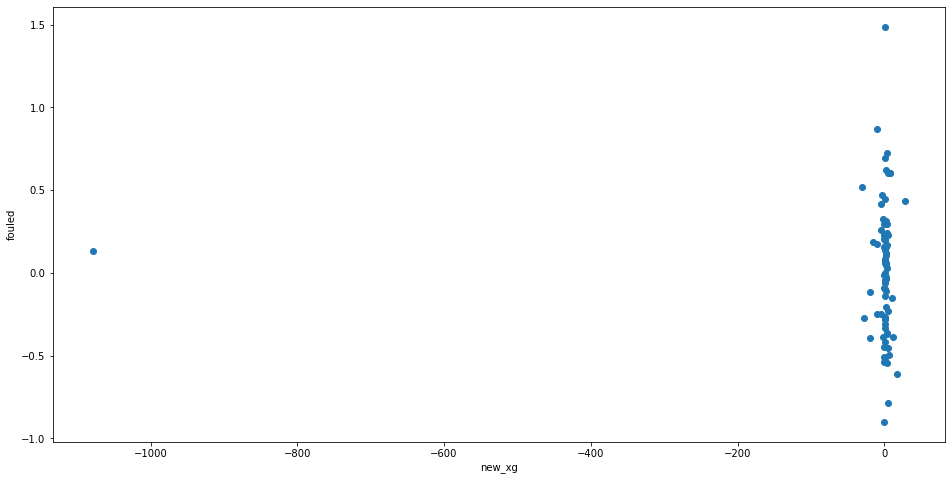

In [10]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['new_xg'], df['Fouled'])
ax.set_xlabel('new_xg')
ax.set_ylabel('fouled')
plt.show()

In [11]:
from scipy import stats
import numpy as np


In [17]:
# X = X.drop(columns=['Country'])


In [18]:
# z = np.abs(stats.zscore(X))
# print(z)

In [19]:
# threshold = 2
# print(np.where(z > 2))

In [20]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [22]:
# print(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

In [23]:
df_no_year = df.drop(columns=['Year'])

In [24]:
df_z = df[(z < 3).all(axis=1)]

In [25]:
df_z.shape

(80, 10)

In [26]:
df_no_year.shape

(84, 9)

In [27]:
df_no_year['results'].value_counts()

32    32
16    21
8     15
3      4
1      4
2      4
4      4
Name: results, dtype: int64

In [28]:
df_z = df_no_year[(z < 3).all(axis=1)]

In [29]:
df_z.shape

(80, 9)

In [30]:
df_z['results'].value_counts()



32    31
16    20
8     15
2      4
4      4
3      3
1      3
Name: results, dtype: int64

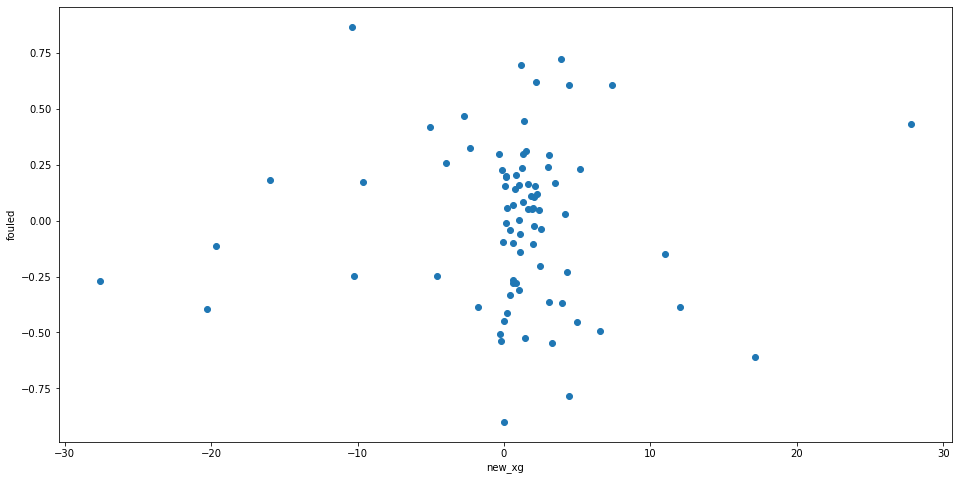

In [31]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_z['new_xg'], df_z['Fouled'])
ax.set_xlabel('new_xg')
ax.set_ylabel('fouled')
plt.show()

## Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
y = df_z['results']

In [34]:
X = df_z.drop(columns=['results', 'Country'])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [36]:
reg = LinearRegression().fit(X_train, y_train)

In [37]:
r_sq = reg.score(X_train, y_train)

In [38]:
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.5446424606264864


In [39]:
reg.coef_

array([-27.26537162,   6.60391544,  -5.91371818,   3.23499861,
        -2.5186174 ,  -0.51694554,  -1.16240417])

In [40]:
print(f"slope: {reg.coef_}")

slope: [-27.26537162   6.60391544  -5.91371818   3.23499861  -2.5186174
  -0.51694554  -1.16240417]


In [41]:
reg.intercept_

24.86653437068695

In [42]:
print(f"intercept: {reg.intercept_}")

intercept: 24.86653437068695


In [43]:
y_pred = reg.predict(X_test)

In [44]:
print(f"predicted response:\n{y_pred}")

predicted response:
[18.217431    1.00353447  6.21782371 30.5217886  14.81128126 23.18195491
 12.46368878 13.90162958 16.59669482 20.00337868 38.93064676 16.22967378
 36.32146624 10.88871225 29.41236418 18.42786728 28.73598535 19.96134809
 11.67213954 14.1244976   4.00667755 12.75384053 17.74545099 17.52666862
 18.8635304  24.29057191 18.7948629 ]


In [45]:
y_pred = reg.intercept_ + np.sum(reg.coef_ * X, axis=1)

In [46]:
print(f"predicted response:\n{y_pred}")

predicted response:
0      1.003534
1      4.942222
4      9.388105
5     32.739902
6     16.596695
        ...    
79    14.578809
80    29.871616
81    13.218584
82    10.040556
83    30.673773
Length: 80, dtype: float64


## Ridge Regression

In [47]:
from sklearn.linear_model import Ridge

In [48]:
clf = Ridge(alpha=1.0)

In [49]:
clf.fit(X_train, y_train)

Ridge()

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [51]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)

print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

8.250775426709172
0.5446365540133639


#### 62% accuracy

In [52]:
pred_test_rr= rr.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

9.729899058048566
0.14264811410737288


### 19% accuracy

## Lasso Regression

In [53]:
from sklearn import linear_model


In [54]:
clf = linear_model.Lasso(alpha=0.1)

In [55]:
clf.fit(X, y)

Lasso(alpha=0.1)

In [56]:
print(clf.coef_)

[-25.9530817    3.20175374  -0.13122448   6.66481567  -0.65378727
  -0.22923819  -2.04891782]


In [57]:
print(clf.intercept_)

23.090381527836414


In [58]:
model_lasso = linear_model.Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)

print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))


pred_test_lasso= model_lasso.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

8.252198454403194
0.5444794655843506
9.78679154315515
0.13259261759314234


### 62% & 20%

## Elastic Net

In [59]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [60]:
regr = ElasticNet(random_state=0)

In [61]:
regr.fit(X, y)

ElasticNet(random_state=0)

In [62]:
print(regr.coef_)

[-2.60649318 -0.18032989 -0.          0.         -0.         -0.38378359
 -0.59564727]


In [63]:
print(regr.intercept_)

19.13876752630819


In [64]:
# print(regr.predict([[0, 0]]))

### SGDRegressor

In [65]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [66]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))

In [67]:
reg.fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

## RANSAC (RANdom SAmple Consensus) algorithm

In [ ]:
from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression

In [ ]:
reg = RANSACRegressor(random_state=0).fit(X, y)

In [ ]:
reg.score(X, y)

In [ ]:
# reg.predict(X[:1,])

## TheilSenRegressor

In [ ]:
from sklearn.linear_model import TheilSenRegressor
from sklearn.datasets import make_regression

In [ ]:
reg = TheilSenRegressor(random_state=0).fit(X, y)

In [ ]:
reg.score(X, y)

In [ ]:
# reg.predict(X[:1,])

## ElasticNetCV

In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression

In [ ]:
regr = ElasticNetCV(cv=5, random_state=0)

In [ ]:
regr.fit(X, y)

In [ ]:
print(regr.alpha_)

In [ ]:
print(regr.intercept_)

In [ ]:
# print(regr.predict([[0, 0]]))

In [ ]:
df

## 2022 Teams

In [ ]:
group_16 = [('Netherlands', 'Wales'),
            ('Argentina', 'Denmark'),
            ('Spain', 'Croatia'),
            ('Brazil', 'Uruguay'),
            ('Spain', 'Russia'),
            ('France', 'Mexico'),
            ('England', 'Germany'),
            ('Portugal', 'Switzerland')]

In [ ]:
ger2020 = ['goals': 2.7]